In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
dfPM10 = pd.read_csv('dane/PM10.csv', index_col=0, parse_dates=True)

In [213]:
dfPM10.isnull().sum().sort_values()

MpKrakAlKras    4010
MpKrakZloRog    4410
MpKrakDietla    4458
MpKrakBulwar    4843
MpKrakWadow     4866
MpKrakBujaka    5297
MpKrakSwoszo    5488
MpKrakOsPias    5511
MpKrakPrad      5525
MpKrakTelime    6802
dtype: int64

In [214]:
df = dfPM10[['MpKrakZloRog', 'MpKrakDietla', 'MpKrakWadow']]

In [215]:
print(df.MpKrakZloRog.first_valid_index())
print(df.MpKrakDietla.first_valid_index())
print(df.MpKrakWadow.first_valid_index())

2016-01-01 00:00:00
2016-01-01 00:00:00
2017-02-03 00:00:00


In [216]:
dfZR = dfPM10.MpKrakZloRog
dfZR = dfZR.loc[df.MpKrakZloRog.first_valid_index():]
dfZR

data
2016-01-01    184.00
2016-01-02     49.00
2016-01-03     56.00
2016-01-04     92.00
2016-01-05    133.00
               ...  
2023-12-27     22.75
2023-12-28     41.58
2023-12-29     20.02
2023-12-30     12.88
2023-12-31     27.16
Name: MpKrakZloRog, Length: 2922, dtype: float64

In [217]:
dfZR.isnull().sum()

np.int64(27)

In [218]:
# filling missimg data
rolling_mean = dfZR.rolling(window=3, min_periods=1).mean()
rolling_mean

data
2016-01-01    184.000000
2016-01-02    116.500000
2016-01-03     96.333333
2016-01-04     65.666667
2016-01-05     93.666667
                 ...    
2023-12-27     12.293333
2023-12-28     24.023333
2023-12-29     28.116667
2023-12-30     24.826667
2023-12-31     20.020000
Name: MpKrakZloRog, Length: 2922, dtype: float64

In [219]:
dfZR.fillna(rolling_mean, inplace=True)

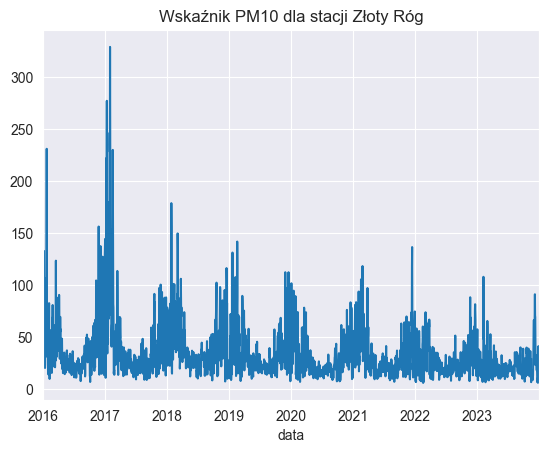

In [220]:
dfZR.plot()
plt.title('Wskaźnik PM10 dla stacji Złoty Róg')
plt.show()

In [221]:
dfZR.describe()

count    2922.000000
mean       34.409218
std        25.877496
min         6.250000
25%        19.030000
50%        27.190000
75%        40.537500
max       329.100000
Name: MpKrakZloRog, dtype: float64

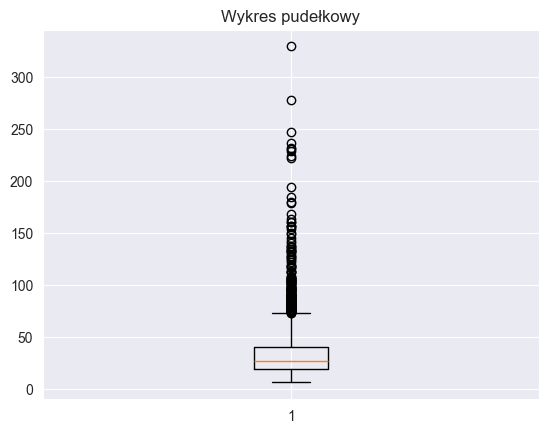

In [222]:
plt.boxplot(dfZR)
plt.title('Wykres pudełkowy')
plt.show()

In [223]:
Q1 = dfZR.quantile(0.25)
Q3 = dfZR.quantile(0.75)
IQR = Q3 - Q1

In [224]:
Q1 - 1.5 * IQR
# not existing value

np.float64(-13.231250000000003)

In [225]:
(dfZR > Q3 + 1.5 * IQR).sum()

np.int64(206)

In [226]:
outliers = dfZR[(dfZR > Q3 + 1.5 * IQR)]
outliers

data
2016-01-01    184.00
2016-01-04     92.00
2016-01-05    133.00
2016-01-06    133.00
2016-01-07    133.00
               ...  
2022-12-20     81.84
2022-12-21     72.95
2023-02-07    108.20
2023-12-06     78.54
2023-12-07     91.42
Name: MpKrakZloRog, Length: 206, dtype: float64

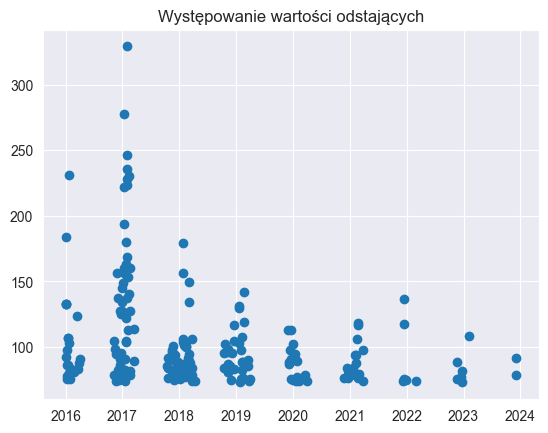

In [227]:
plt.scatter(x=outliers.index, y=outliers.values)
plt.title('Występowanie wartości odstających')
plt.show()
# probably not error, just extreme values
# 10 biggest to max

In [228]:
outliers.groupby(outliers.index.month).count()

data
1     61
2     43
3     26
4      2
10     7
11    25
12    42
Name: MpKrakZloRog, dtype: int64

In [229]:
outliers.sort_values(ascending=False)

data
2017-01-30    329.10
2017-01-11    277.30
2017-01-28    246.70
2017-01-27    236.00
2016-01-23    231.20
               ...  
2019-03-22     74.10
2020-03-29     74.10
2018-03-22     73.73
2019-01-28     73.21
2022-12-21     72.95
Name: MpKrakZloRog, Length: 206, dtype: float64

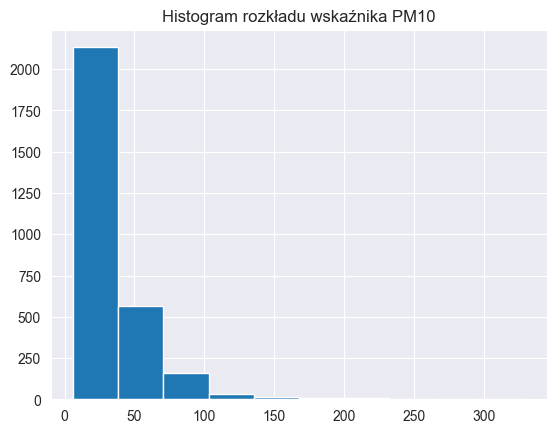

In [230]:
plt.hist(dfZR)
plt.title('Histogram rozkładu wskaźnika PM10')
plt.show()

In [260]:
# adding new features
dfZR = dfZR.to_frame()
dfZR['miesiac'] = dfZR.index.month
dfZR['dzien'] = dfZR.index.dayofweek

In [262]:
# rolling means
dfZR['pm10_7d_avg'] = dfZR['MpKrakZloRog'].rolling(window=7).mean()
dfZR['pm10_30d_avg'] = dfZR['MpKrakZloRog'].rolling(window=30).mean()

In [263]:
# lags
for lag in range(1, 8):
    dfZR[f'lag_{lag}'] = dfZR['MpKrakZloRog'].shift(lag)


In [264]:
display(dfZR)

,MpKrakZloRog,miesiac,dzien,pm10_7d_avg,pm10_30d_avg,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
data,,,,,,,,,,,,
2016-01-01,184.00,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,49.00,1,5,NaN,NaN,184.00,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,56.00,1,6,NaN,NaN,49.00,184.00,NaN,NaN,NaN,NaN,NaN
2016-01-04,92.00,1,0,NaN,NaN,56.00,49.00,184.00,NaN,NaN,NaN,NaN
2016-01-05,133.00,1,1,NaN,NaN,92.00,56.00,49.00,184.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,22.75,12,2,10.431429,34.006667,7.74,6.39,8.54,10.11,10.44,7.05,15.12
2023-12-28,41.58,12,3,15.364286,34.396333,22.75,7.74,6.39,8.54,10.11,10.44,7.05
2023-12-29,20.02,12,4,16.732857,33.606333,41.58,22.75,7.74,6.39,8.54,10.11,10.44


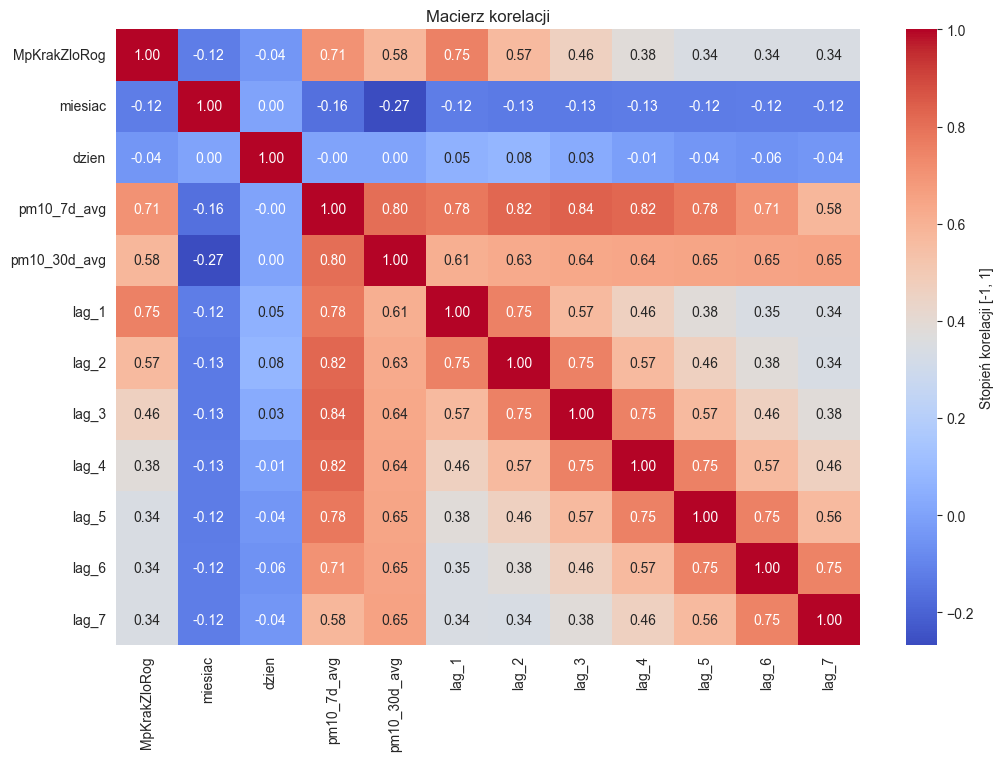

In [265]:
correlation = dfZR.dropna().corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Stopień korelacji [-1, 1]'})

plt.title('Macierz korelacji')
plt.show()

In [ ]:
# predictions

In [270]:
# stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfZR['MpKrakZloRog'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
# data are stationary

ADF Statistic: -5.324798897531803
p-value: 4.8638168415695444e-06


In [280]:
dfZR.columns

Index(['MpKrakZloRog', 'miesiac', 'dzien', 'pm10_7d_avg', 'pm10_30d_avg',
       'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7'],
      dtype='object')

In [283]:
# standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfZR_std = dfZR.copy()

cols_std = ['MpKrakZloRog', 'pm10_7d_avg', 'pm10_30d_avg','lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']
dfZR_std[cols_std] = scaler.fit_transform(dfZR_std[cols_std])

,MpKrakZloRog,miesiac,dzien,pm10_7d_avg,pm10_30d_avg,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
data,,,,,,,,,,,,
2016-01-01,5.781718,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.563937,1,5,NaN,NaN,5.780710,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,0.834489,1,6,NaN,NaN,0.563752,5.780121,NaN,NaN,NaN,NaN,NaN
2016-01-04,2.225897,1,0,NaN,NaN,0.834261,0.563438,5.779247,NaN,NaN,NaN,NaN
2016-01-05,3.810556,1,1,NaN,NaN,2.225450,0.833932,0.563180,5.778428,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,-0.450631,12,2,-1.189955,-0.011313,-1.030705,-1.083102,-1.000094,-0.939190,-0.926470,-1.057777,-0.746455
2023-12-28,0.277152,12,3,-0.944504,0.012534,-0.450656,-1.030935,-1.083165,-0.999841,-0.939216,-0.926833,-1.058180
2023-12-29,-0.556147,12,4,-0.876406,-0.035812,0.277013,-0.450917,-1.031004,-1.082899,-0.999859,-0.939580,-0.927232
